# Analysis of AMEO Data

## Introduction

### Dataset Description

The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, released by Aspiring Minds, focuses on employment outcomes for engineering graduates. It includes dependent variables such as Salary, Job Titles, and Job Locations, along with standardized scores in cognitive skills, technical skills, and personality skills. With around 40 independent variables and 4000 data points, these variables encompass both continuous and categorical data. The dataset also includes demographic features and unique identifiers for each candidate.

### Objective

The goal of this Exploratory Data Analysis (EDA) is to extensively investigate the provided dataset, with a particular emphasis on understanding the link between various variables and the target variable, Salary.

The key aims of this analysis include:

- Providing a detailed explanation of the dataset's features.
- Find any observable patterns or trends in the data.
- Investigating the relationships between the independent factors and the target variable (salary).
- Identify any outliers or abnormalities in the dataset.
- Offering practical insights and recommendations based on the analysis.


## Importing the data and dislaying the head, shape, descriptions, etc.

In [440]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [441]:
ameo_data = pd.read_csv('../dataset/AMEO_data.csv')
df1 = ameo_data.copy()
df1.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [442]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   int64  
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [443]:
df1.shape

(3998, 39)

In [444]:
df1.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [445]:
df1.duplicated().sum()

0

In [446]:
df1.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [447]:
df1.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [448]:
df1 = df1.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,6/1/2012 0:00,present,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,9/1/2013 0:00,present,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,6/1/2014 0:00,present,systems engineer,Chennai,f,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,7/1/2011 0:00,present,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,3/1/2014 0:00,3/1/2015 0:00,get,Manesar,m,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Datatypes Conversion

#### 1. DOL - Date of Leaving. 
The survey was conducted back in 2015 and therefore making an assumption that the respondents who responded as **present** for DOL actually left the company within 2015 only. So, we will replace **present** value in DOL with 2024-02-17. 

    Then we convert the datetype of `DOJ` and `DOL` to datetime.

In [449]:
df1['DOL'].replace('present','2015-12-31', inplace = True)
df1['DOL'] = pd.to_datetime(df1['DOL'])
df1['DOJ'] = pd.to_datetime(df1['DOJ'])
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [450]:
categorical = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Degree',
              'Specialization','CollegeCityTier','CollegeState']
for cat in categorical:
    df1[cat] = df1[cat].astype('category')

In [451]:
df1.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                    category
JobCity                        category
Gender                         category
DOB                              object
10percentage                    float64
10board                        category
12graduation                      int64
12percentage                    float64
12board                        category
CollegeTier                    category
Degree                         category
Specialization                 category
collegeGPA                      float64
CollegeCityTier                category
CollegeState                   category
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


#### 2. Checking if the `DOL (Date of leaving)` is actually greater than `DOJ (Date of joining)`.

In [452]:
dates = df1[(df1['DOL'] < df1['DOJ'])].shape[0]
print(f'DOL is earlier than DOJ for {dates} observations.')
print(df1.shape)

DOL is earlier than DOJ for 40 observations.
(3998, 35)


These observations might be typos and hence we will drop those 40 rows.

In [453]:
df1 = df1.drop(df1[~(df1['DOL'] > df1['DOJ'])].index)
print(df1.shape)

(3943, 35)


#### 3. Making the entries for `Gender` column more descriptive

In [454]:
df1['Gender'].replace({'f':'Female','m':'Male'}, inplace = True)
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### 4. Validating if the results are in percentages and not in CGPA or otherwise.

In [455]:
print((df1['10percentage'] <=10).sum())
print((df1['12percentage'] <=10).sum())
print((df1['collegeGPA'] <=10).sum())

0
0
12


`10percentage` and `12percentage` are fine but `collegeGPA` has 12 obvservations which need to be deal with.

In [456]:
df1.loc[df1['collegeGPA']<=10,'collegeGPA'].index

Int64Index([7, 138, 788, 1419, 1439, 1767, 2151, 2229, 2293, 2662, 2691, 3308], dtype='int64')

In [457]:
df1.loc[df1['collegeGPA']<=10,'collegeGPA'] = (df1.loc[df1['collegeGPA']<=10,'collegeGPA']/10)*100
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### 5. Validating if there exist 0 or -1 in the data

In [458]:
print((df1==0).sum()[(df1==0).sum() > 0])

CollegeCityTier    2761
GraduationYear        1
dtype: int64


In [459]:
(df1==-1).sum()[(df1==-1).sum()>0]/len(df1)*100

Domain                    6.137459
ComputerProgramming      21.836165
ElectronicsAndSemicon    71.392341
ComputerScience          77.605884
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg              90.565559
CivilEngg                98.934821
dtype: float64

According to the description of the columns:

1. 10board
2. 12board
3. GraduationYear
4. JobCity
5. Domain

**The above columns cannot have 0 or -1 as their inputs and hence they should be considered as null values and therefore imputed**

The following columns describes subjects which are optional for the exam and that is why they have large number of -1(null values). Hence we will be dropping the columns out of analysis in which the percentage for -1 values is greater than or equal to 80% and for the rest of them, we will impute the values as zero.

| Sr.No. | Column Name              | Null Score      |
|------|---------------------|------------|
| 1    | ElectronicsAndSemicon | 71.392341 |
| 2    | ComputerScience       | 77.605884 |
| 3    | MechanicalEngg        | 94.040071 |
| 4    | ElectricalEngg        | 96.094344 |
| 5    | TelecomEngg           | 90.565559 |
| 6    | CivilEngg             | 98.934821 |          

In [460]:
df1 = df1.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [461]:
df1['10board'] = df1['10board'].astype(str)
df1['12board'] = df1['12board'].astype(str)
df1['JobCity'] = df1['JobCity'].astype(str)

In [462]:
df1['10board'] = df1['10board'].replace({'0':np.nan})
df1['12board'] = df1['12board'].replace({'0':np.nan})
df1['GraduationYear'] = df1['GraduationYear'].replace({0:np.nan})
df1['JobCity'] = df1['JobCity'].replace({'-1':np.nan})
df1['Domain'] = df1['Domain'].replace({-1:np.nan})
df1['ElectronicsAndSemicon'] = df1['ElectronicsAndSemicon'].replace({-1:0})
df1['ComputerScience'] = df1['ComputerScience'].replace({-1:0})
df1['ComputerProgramming'] = df1['ComputerProgramming'].replace({-1:np.nan})

In [463]:
df1['10board'] = df1['10board'].astype('category')
df1['12board'] = df1['12board'].astype('category')
df1['JobCity'] = df1['JobCity'].astype('category')

In [464]:
df1

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.60,cbse,2007,83.60,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,800000,2014-04-01,2015-04-01,manager,Rajkot,Male,6/22/1990 0:00,73.00,NaN,2008,54.00,NaN,2,B.Tech/B.E.,civil engineering,79.00,0,Orissa,2012.0,405,345,525,0.938588,NaN,0,0,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,280000,2011-10-01,2012-10-01,software engineer,New Delhi,Male,4/15/1987 0:00,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,information technology,61.50,0,Haryana,2010.0,365,334,475,0.276047,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,Male,7/3/1991 0:00,81.86,"bse,odisha",2008,65.50,"chse,odisha",2,B.Tech/B.E.,computer engineering,70.00,0,Orissa,2012.0,475,475,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,Female,3/20/1992 0:00,78.72,state board,2010,69.88,state board,2,B.Tech/B.E.,computer science & engineering,70.42,1,Karnataka,2014.0,450,410,320,0.744758,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


Imputing categorical columns with mode values for their respective columns.

In [465]:
df1['10board'].fillna(df1['10board'].mode()[0], inplace = True)
df1['12board'].fillna(df1['12board'].mode()[0], inplace = True)
df1['GraduationYear'].fillna(df1['GraduationYear'].mode()[0], inplace = True)
df1['JobCity'].fillna(df1['JobCity'].mode()[0], inplace = True)

df1

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.60,cbse,2007,83.60,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,800000,2014-04-01,2015-04-01,manager,Rajkot,Male,6/22/1990 0:00,73.00,cbse,2008,54.00,cbse,2,B.Tech/B.E.,civil engineering,79.00,0,Orissa,2012.0,405,345,525,0.938588,NaN,0,0,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,280000,2011-10-01,2012-10-01,software engineer,New Delhi,Male,4/15/1987 0:00,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,information technology,61.50,0,Haryana,2010.0,365,334,475,0.276047,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,Male,7/3/1991 0:00,81.86,"bse,odisha",2008,65.50,"chse,odisha",2,B.Tech/B.E.,computer engineering,70.00,0,Orissa,2012.0,475,475,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,Female,3/20/1992 0:00,78.72,state board,2010,69.88,state board,2,B.Tech/B.E.,computer science & engineering,70.42,1,Karnataka,2014.0,450,410,320,0.744758,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


Imputing the numerical columns with median values for their respective columns.

In [466]:
df1['Domain'].fillna(df1['Domain'].median(), inplace = True)
df1['ComputerProgramming'].fillna(df1['ComputerProgramming'].median(), inplace = True)
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,Female,2/19/1990 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,Male,10/4/1989 0:00,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,Female,8/3/1992 0:00,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,Male,12/5/1989 0:00,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,Male,2/27/1991 0:00,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### 6. Correcting string data in columns

In [467]:
def correct_string_data(data):
    '''
    Convert the textual categories to lower case
    and remove the leading or trailing spaces if any.
    
    '''
    df1[data] = df1[data].str.lower().str.strip()

In [468]:
textual_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

In [469]:
for col in textual_columns:
    print(f'Number of unique values in {col} with inconsistency : {df1[col].nunique()}')

Number of unique values in Designation with inconsistency : 416
Number of unique values in JobCity with inconsistency : 337
Number of unique values in 10board with inconsistency : 274
Number of unique values in 12board with inconsistency : 339
Number of unique values in Specialization with inconsistency : 46
Number of unique values in CollegeState with inconsistency : 26


In [470]:
for col in textual_columns:
    correct_string_data(col)

In [471]:
for col in textual_columns:
    print(f'Number of unique values in {col} without inconsistency : {df1[col].nunique()}')

Number of unique values in Designation without inconsistency : 416
Number of unique values in JobCity without inconsistency : 230
Number of unique values in 10board without inconsistency : 272
Number of unique values in 12board without inconsistency : 336
Number of unique values in Specialization without inconsistency : 46
Number of unique values in CollegeState without inconsistency : 26


**Since the number of categories are large enough to deal with, we keep the top 10 categories.**

### Collapsing Categories

Keeping only the top 10 frequent categories and classifying others as **other**.

In [472]:
def collapsing_categories(df1, data):
    for Designation in df1[data].unique():
        min_count = df1[data].value_counts()[:10].min()
        if df1[df1[data] == Designation][data].value_counts()[0] < min_count:
            df1.loc[df1[data] == Designation, data] = 'other'

In [473]:
for cols in textual_columns:
    collapsing_categories(df1, cols)

In [474]:
for cols in textual_columns:
    print('')
    print('Top 10 categories in:', cols)
    print('')
    print(df1[cols].value_counts())
    print('')
    print('*'*100)


Top 10 categories in: Designation

other                         2259
software engineer              535
software developer             262
system engineer                202
programmer analyst             139
systems engineer               117
java software engineer         109
software test engineer         100
project engineer                76
technical support engineer      73
senior software engineer        71
Name: Designation, dtype: int64

****************************************************************************************************

Top 10 categories in: JobCity

bangalore    1109
other         807
noida         382
hyderabad     361
pune          322
chennai       310
gurgaon       212
new delhi     203
mumbai        119
kolkata       118
Name: JobCity, dtype: int64

****************************************************************************************************

Top 10 categories in: 10board

cbse                            1726
state board                     11

In [475]:
df1

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,2/19/1990 0:00,84.30,other,2007,95.80,other,2,B.Tech/B.E.,computer engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,other,other,Male,10/4/1989 0:00,85.40,cbse,2007,85.00,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,8/3/1992 0:00,85.00,cbse,2010,68.20,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,12/5/1989 0:00,85.60,cbse,2007,83.60,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,other,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,other,other,Male,2/27/1991 0:00,78.00,cbse,2008,76.80,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,800000,2014-04-01,2015-04-01,other,other,Male,6/22/1990 0:00,73.00,cbse,2008,54.00,cbse,2,B.Tech/B.E.,other,79.00,0,other,2012.0,405,345,525,0.938588,455.0,0,0,0.3555,-0.9033,0.9623,0.64983,-0.4229
3993,280000,2011-10-01,2012-10-01,software engineer,new delhi,Male,4/15/1987 0:00,52.09,cbse,2006,55.50,cbse,2,B.Tech/B.E.,information technology,61.50,0,haryana,2010.0,365,334,475,0.276047,345.0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3995,320000,2013-07-01,2015-12-31,other,bangalore,Male,7/3/1991 0:00,81.86,other,2008,65.50,other,2,B.Tech/B.E.,computer engineering,70.00,0,other,2012.0,475,475,465,0.488348,405.0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,other,Female,3/20/1992 0:00,78.72,state board,2010,69.88,state board,2,B.Tech/B.E.,computer science & engineering,70.42,1,karnataka,2014.0,450,410,320,0.744758,445.0,0,438,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


### Feature Engineering

#### 1. Since the dataset was release in 2015, we add a age column by subtracting DOB year from 2015. This will add the age as of 2015.

In [476]:
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['Age'] = 2015 - df1['DOB'].dt.year
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000,2012-06-01,2015-12-31,other,bangalore,Female,1990-02-19,84.3,other,2007,95.8,other,2,B.Tech/B.E.,computer engineering,78.00,0,andhra pradesh,2011.0,515,585,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25
1,500000,2013-09-01,2015-12-31,other,other,Male,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,madhya pradesh,2012.0,695,610,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26
2,325000,2014-06-01,2015-12-31,systems engineer,chennai,Female,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,uttar pradesh,2014.0,615,545,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23
3,1100000,2011-07-01,2015-12-31,senior software engineer,gurgaon,Male,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,other,2011.0,635,585,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26
4,200000,2014-03-01,2015-03-01,other,other,Male,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,uttar pradesh,2012.0,545,625,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24


#### 2. Adding a tenure column by subtracting the `DOL` from `DOJ`

In [477]:
delta = (df1['DOL'] - df1['DOJ'])
tenure = np.zeros(len(df1))
for i, date in enumerate(delta):
    tenure[i] = round(date.days/365,2)
df1['Tenure'] = tenure

#### 3. Dropping the rows where the graduationyear is greater than or equal to date of joining

In [478]:
len(df1[(df1['GraduationYear'] > df1['DOJ'].dt.year)].index)

79

In [479]:
df1 = df1.drop(df1[(df1['GraduationYear'] > df1['DOJ'].dt.year)].index)

#### 4. Function to calculate CDF

In [480]:
def cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

## Univariate Analysis

### 1. Continuous Features

In [481]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

#### 1.1 Tenure

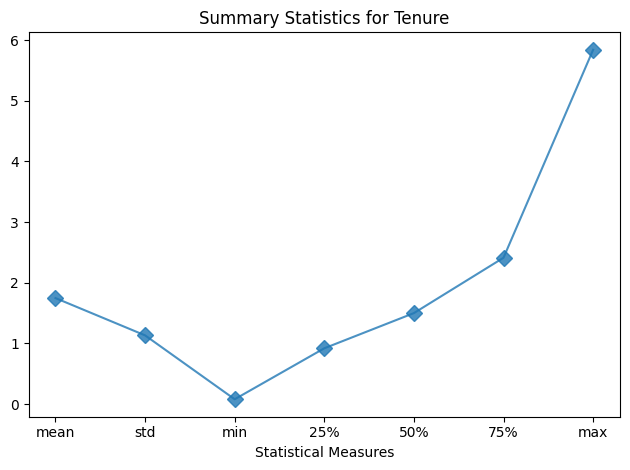

In [482]:
df1['Tenure'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Tenure')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

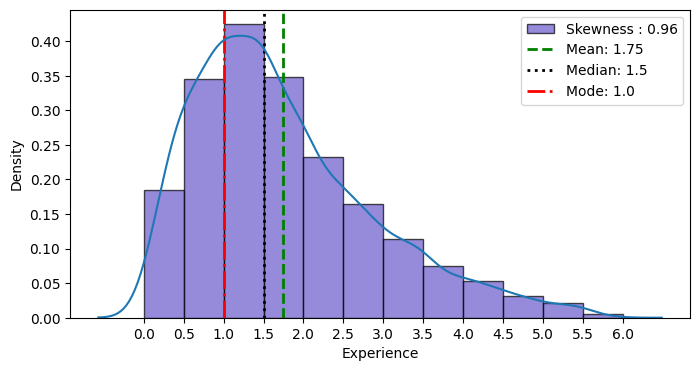

In [489]:
plt.figure(figsize = (8,4))
plt.hist(df1['Tenure'],
        ec = 'k',
        bins = np.arange(0, df1['Tenure'].max()+0.5, 0.5),
        color = 'slateblue',
        alpha = 0.7,
        label = f"Skewness : {round(df1['Tenure'].skew(),2)}",
        density = True)
plt.xticks(ticks = np.arange(0, df1['Tenure'].max()+0.5, 0.5))
plt.xlabel('Experience')
plt.ylabel('Density')
plt.axvline(df1['Tenure'].mean(), label = f"Mean: {round(df1['Tenure'].mean(),2)}", 
            linestyle = '--',
           color = 'green', linewidth = 2)
plt.axvline(df1['Tenure'].median(), label = f"Median: {round(df1['Tenure'].median(),2)}",
            linestyle = ':',
           color = 'k', linewidth = 2)
plt.axvline(df1['Tenure'].mode()[0], label = f"Mode: {round(df1['Tenure'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
sns.kdeplot(df1['Tenure'])
plt.legend()
plt.show()

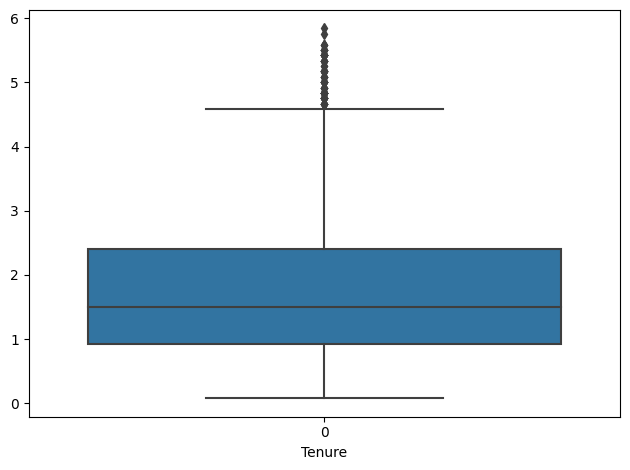

In [490]:
sns.boxplot(df1['Tenure'])
plt.xlabel('Tenure')
plt.tight_layout()
plt.show()

In [491]:
x_tenure, y_tenure = cdf(df1['Tenure'])
x_sample_tenure, y_sample_tenure = cdf(np.random.normal(df1['Tenure'].mean(), df1['Tenure'].std(), size = len(df1['Tenure'])))

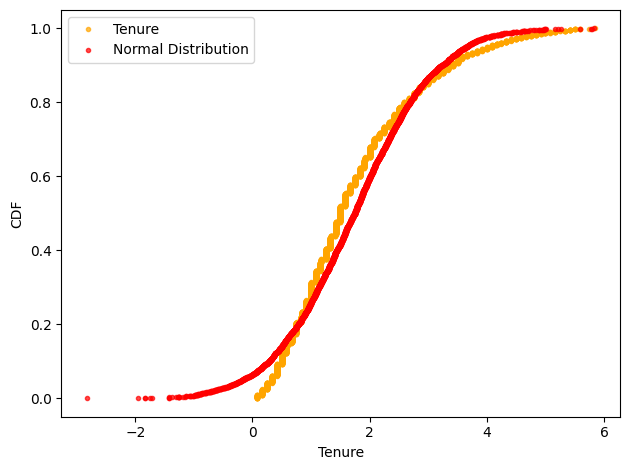

In [492]:
plt.plot(x_tenure, y_tenure, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_tenure, y_sample_tenure, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Tenure')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Conclusions


| Sr.No. | Plot Name | Inferences |
| ------ | --------- | ---------- |
| 1.     | Summary Plot |  - The range for experience is 4 years. |
| 2.     | Histogram | - The data is positively skewed i.e there exists larger number of respondents with low tenure, 50% data points are below 1.5 years, Average tenure is 1.5 years, The mean, median, and mode lie very close to each other and skewness (0.6) is close to that of a normal (0). |
| 3.     | Box Plot | - There are few values with large tenure i.e outliers |
| 4.     | CDF | - The data is not normally distributed, We can say that tenure is not normally distributed. |



#### 1.2 Salary

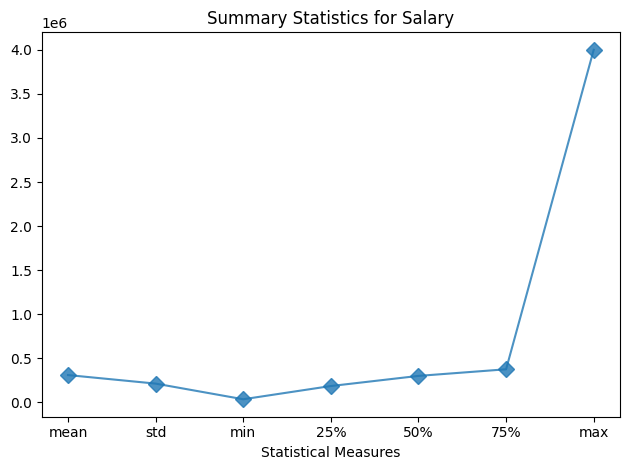

In [493]:
df1['Salary'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

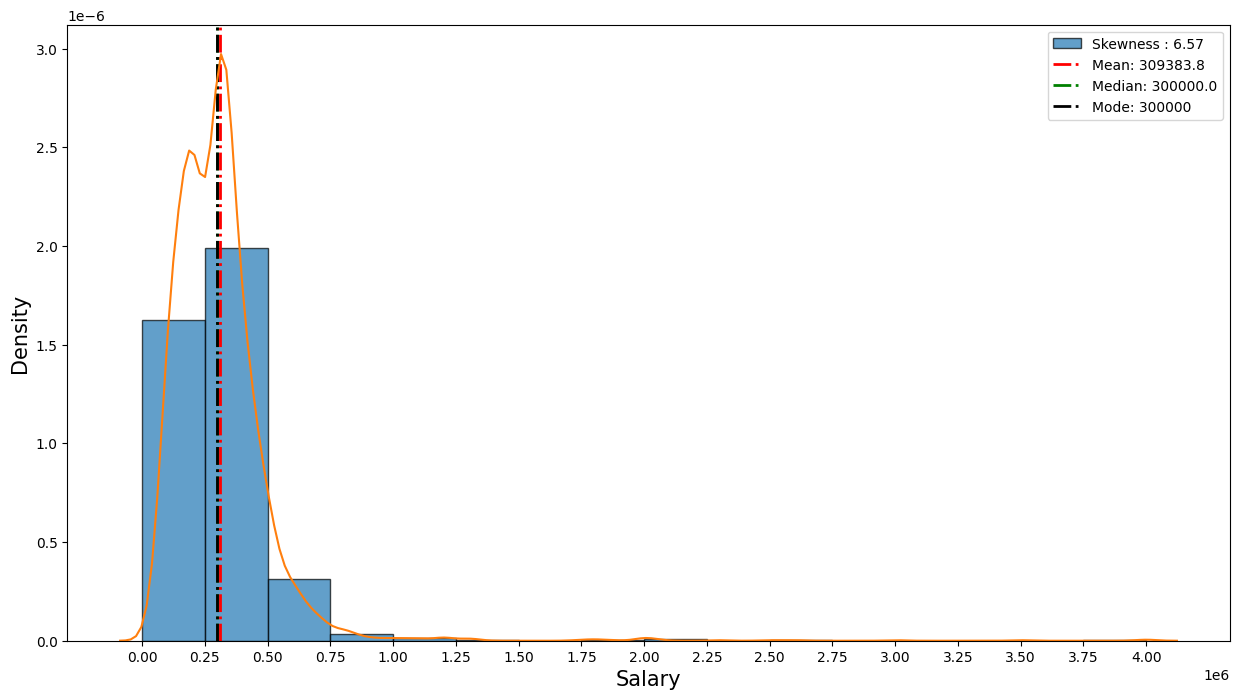

In [494]:
bins = np.arange(0, df1['Salary'].max()+250000, 250000)
plt.figure(figsize = (15,8))
plt.hist(df1['Salary'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df1['Salary'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('Salary', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df1['Salary'].mean(), label = f"Mean: {round(df1['Salary'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df1['Salary'].median(), label = f"Median: {round(df1['Salary'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df1['Salary'].mode()[0], label = f"Mode: {round(df1['Salary'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df1['Salary'])
plt.legend()
plt.show()

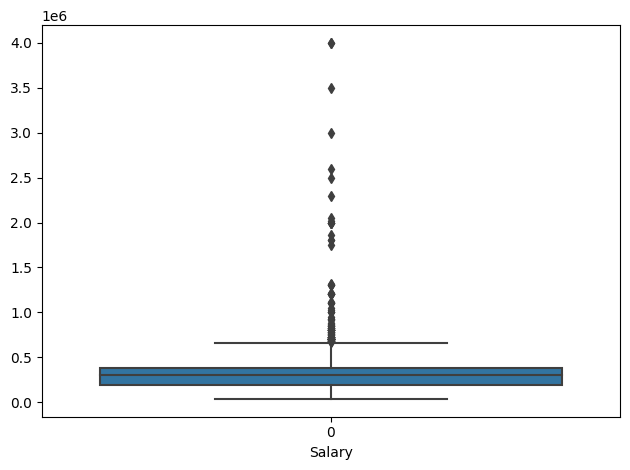

In [495]:
sns.boxplot(df1['Salary'])
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

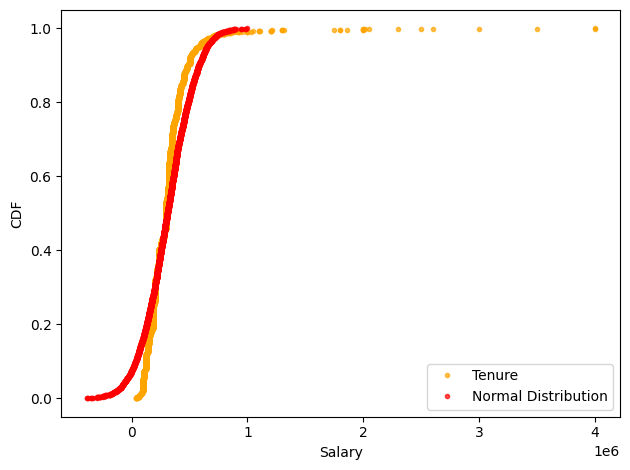

In [496]:
x_salary, y_salary = cdf(df1['Salary'])
x_sample_salary, y_sample_salary = \
cdf(np.random.normal(df1['Salary'].mean(), df1['Salary'].std(), size = len(df1['Salary'])))
plt.plot(x_salary, y_salary, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = 'Tenure')
plt.plot(x_sample_salary, y_sample_salary, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('Salary')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Conclusions

| **Plot Name** | **Inferences** |
|---|---|
| 1. Summary Plot | There is substantial variation in salary across the dataset. |
| 2. Histogram | The data exhibits significant positive skewness, with a skewness value around 6 (approximately), indicating a departure from a normal distribution. The measures of central tendency (mean, median, and mode) are approximately equal. |
| 3. Box Plot | There is a notable concentration of data points with high salaries, as depicted by the box plot. |
| 4. CDF | The cumulative distribution function (CDF) reveals a high degree of skewness in the data, with considerable deviation from a normal distribution pattern. |


#### 1.3 10th Percentage

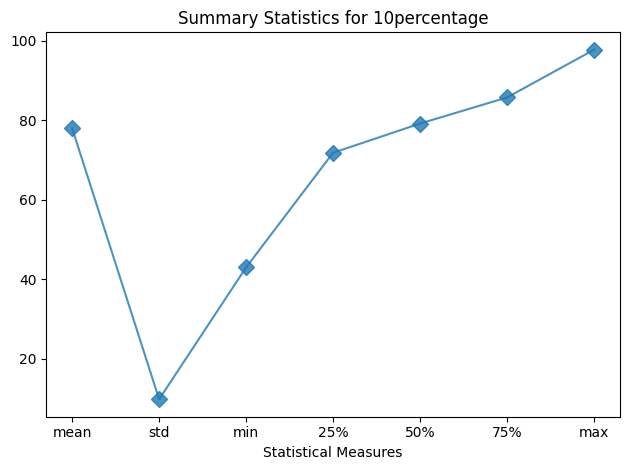

In [497]:
df1['10percentage'].describe()[1:].plot(alpha = 0.8, 
                                 marker = 'D', markersize = 8)
plt.title('Summary Statistics for 10percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

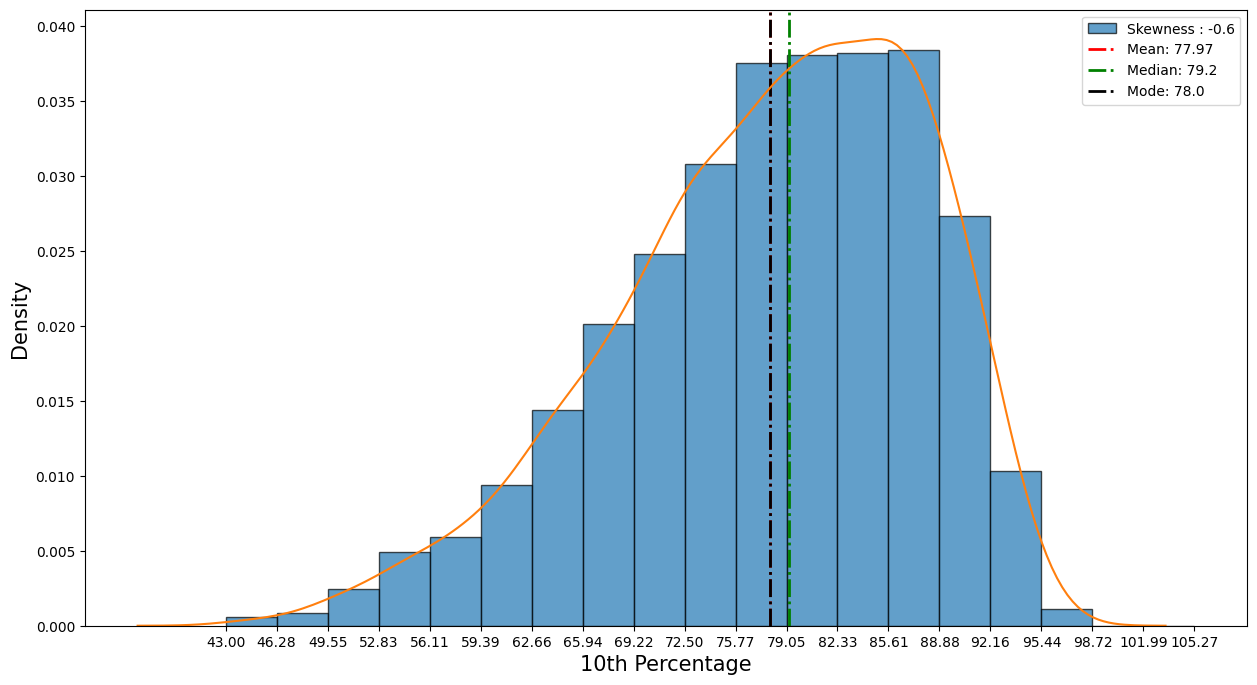

In [498]:
bins = np.arange(df1['10percentage'].min(), df1['10percentage'].max()+df1['10percentage'].std(), 
                 df1['10percentage'].std()/3)
plt.figure(figsize = (15,8))
plt.hist(df1['10percentage'], ec = 'k',
        bins = bins,
        label = f"Skewness : {round(df1['10percentage'].skew(),2)}",
        alpha = 0.7,
        density = True)
plt.xticks(bins)
plt.xlabel('10th Percentage', size = 15)
plt.ylabel('Density', size = 15)

plt.axvline(df1['10percentage'].mean(), label = f"Mean: {round(df1['10percentage'].mean(),2)}"
            , linestyle = '-.',
           color = 'red', linewidth = 2)
plt.axvline(df1['10percentage'].median(), label = f"Median: {round(df1['10percentage'].median(),2)}"
            , linestyle = '-.',
           color = 'green', linewidth = 2)
plt.axvline(df1['10percentage'].mode()[0], label = f"Mode: {round(df1['10percentage'].mode()[0],2)}"
            , linestyle = '-.',
           color = 'k', linewidth = 2)
sns.kdeplot(df1['10percentage'])
plt.legend()
plt.show()

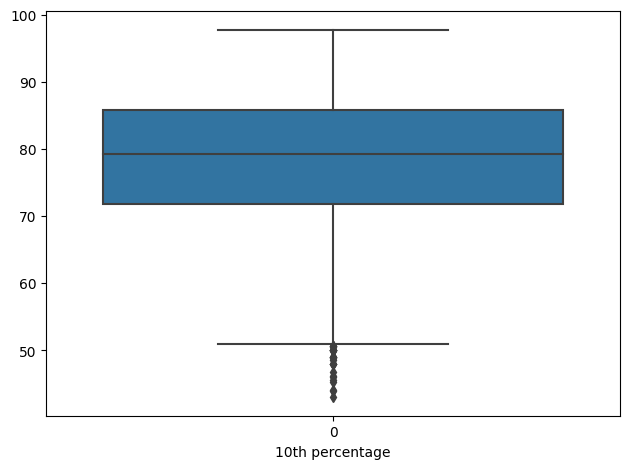

In [499]:
sns.boxplot(df1['10percentage'])
plt.xlabel('10th percentage')
plt.tight_layout()
plt.show()

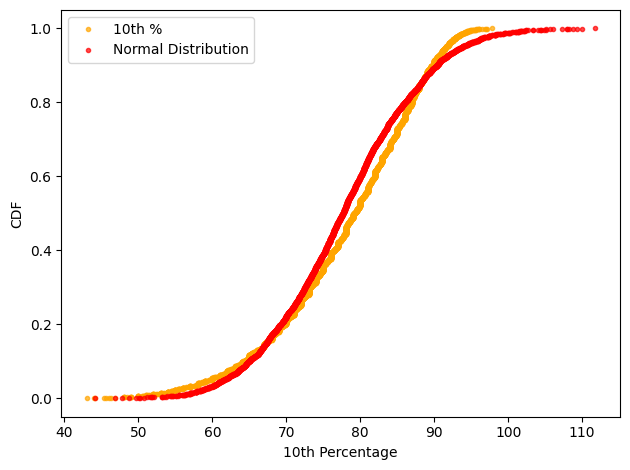

In [500]:
x_10, y_10 = cdf(df1['10percentage'])
x_sample_10 , y_sample_10 = \
cdf(np.random.normal(df1['10percentage'].mean(), df1['10percentage'].std(), size = len(df1['10percentage'])))
plt.plot(x_10, y_10, linestyle = 'None', 
        marker = '.', color = 'orange',
         alpha = 0.7, label = '10th %')
plt.plot(x_sample_10, y_sample_10, linestyle = 'None',
        marker ='.', color = 'red',
        alpha = 0.7, label = 'Normal Distribution')
plt.xlabel('10th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

##### Conclusions

| **Conclusions** | Inferences |
|---|---|
| 1. Summary Plot | Around 50% of students achieved scores of approximately 80% or less. |
| 2. Histogram | The histogram depicts a scarcity of students with low percentages, with the majority falling within the 75% to 90% range. The peak frequency occurs at 78%, and the average score hovers around 77%. |
| 3. Box Plot | The presence of a few extreme outliers is evident from the box plot. |
| 4. CDF | The data exhibits some skewness and does not conform to a normal distribution pattern. |

